# Exploratory Data Analytics and Visualisation for Crop Production dataset
- The purpose of this script is to conduct Exploratory Data Analysis and Visualizations on the crop production dataset, in order to uncover insights that could be useful for predicting crop yield.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read file into dataframe
df = pd.read_csv('crop_production.csv')
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [3]:
#Summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [4]:
# Shape of the dataset
df.shape

(246091, 7)

In [5]:
# Checking for null values
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

The production feature has some null entries

We will create a copy of the dataset to perform some cleaning and further analysis on

In [6]:
df_clean = df.copy()

In [7]:
#drop the null entries
df_clean.dropna(inplace = True)

In [8]:
# Summary of the cleaned dataset
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242361 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     242361 non-null  object 
 1   District_Name  242361 non-null  object 
 2   Crop_Year      242361 non-null  int64  
 3   Season         242361 non-null  object 
 4   Crop           242361 non-null  object 
 5   Area           242361 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 14.8+ MB


In [9]:
# Check the shape of the cleaned dataset
df_clean.shape

(242361, 7)

In [10]:
# Statistics of the dataset
df_clean.describe()

,Crop_Year,Area,Production
count,242361.000000,2.423610e+05,2.423610e+05
mean,2005.625773,1.216741e+04,5.825034e+05
std,4.958285,5.085744e+04,1.706581e+07
min,1997.000000,1.000000e-01,0.000000e+00
25%,2002.000000,8.700000e+01,8.800000e+01
50%,2006.000000,6.030000e+02,7.290000e+02
75%,2010.000000,4.545000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


## Exploratory Data Analytics (EDA)
> Firstly, check the correlation between the numerical features in the dataset.<br> 
<b>Note</b>, that the dependent variable is our 'Production'. This is what will be observed in relation to other variables.

In [11]:
# Getting the correlation of the numerical features
corr = df_clean.select_dtypes(include = np.number).corr()

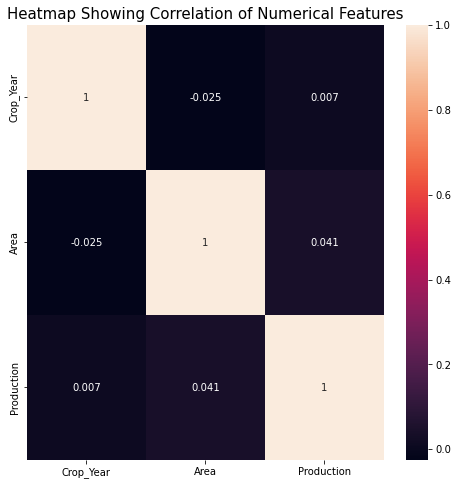

In [12]:
# Plot heatmap of correlation
plt.figure(figsize = (8,8))
plt.title('Heatmap Showing Correlation of Numerical Features', fontsize = 15)
sns.heatmap(corr, annot = True, cmap = 'rocket');

The above plot show very minimal to no correlation between the Production and other numerical features in the dataset.

In [13]:
df_clean['Crop'].nunique()

124

There are 124 crops in the dataset. However, we will be looking through the crops with the highest production.

In [14]:
df_clean['Crop'].value_counts().nlargest(10)

Rice                 15082
Maize                13787
Moong(Green Gram)    10106
Urad                  9710
Sesamum               8821
Groundnut             8770
Wheat                 7878
Sugarcane             7827
Rapeseed &Mustard     7533
Arhar/Tur             7476
Name: Crop, dtype: int64

This shows that Rice is the crop that is most planted. 

In [15]:
df_clean.groupby(['Crop'], sort = True)['Production'].sum().nlargest(10)

Crop
Coconut         1.299816e+11
Sugarcane       5.535682e+09
Rice            1.605470e+09
Wheat           1.332826e+09
Potato          4.248263e+08
Cotton(lint)    2.970000e+08
Maize           2.733418e+08
Jute            1.815582e+08
Banana          1.461327e+08
Soyabean        1.418372e+08
Name: Production, dtype: float64

Though Rice is the most planted, Coconut has the highest total production.

In [16]:
df_clean['State_Name'].nunique()

33

There are 33 states. I will be looking at the 10 states with the highest production.

In [17]:
df_clean.groupby(['State_Name','Crop'], sort = True)['Production'].sum().nlargest(10)

State_Name                   Crop     
Kerala                       Coconut      9.780304e+10
Andhra Pradesh               Coconut      1.680600e+10
Tamil Nadu                   Coconut      1.093774e+10
Uttar Pradesh                Sugarcane    2.202875e+09
Assam                        Coconut      1.954408e+09
Maharashtra                  Sugarcane    9.384860e+08
Tamil Nadu                   Sugarcane    8.474968e+08
West Bengal                  Coconut      7.178412e+08
Andaman and Nicobar Islands  Coconut      7.177900e+08
Karnataka                    Sugarcane    5.158455e+08
Name: Production, dtype: float64

Kerala has the highest production of Coconut amongst other states

In [18]:
df_clean.groupby(['Crop_Year','State_Name'], sort = True)['Production'].sum().nlargest(10)

Crop_Year  State_Name
2005       Kerala        6.330149e+09
2011       Tamil Nadu    6.260873e+09
2006       Kerala        6.058003e+09
2004       Kerala        6.005025e+09
2014       Kerala        5.951363e+09
2011       Kerala        5.944704e+09
2013       Kerala        5.925293e+09
2003       Kerala        5.880749e+09
2008       Kerala        5.806277e+09
2012       Kerala        5.803399e+09
Name: Production, dtype: float64

2005 had the highest production

In [19]:
df_clean.groupby(['Crop','Season'], sort = True)['Production'].sum().nlargest(10)

Crop          Season     
Coconut       Whole Year     1.299815e+11
Sugarcane     Whole Year     3.745173e+09
              Kharif         1.774444e+09
Wheat         Rabi           1.323890e+09
Rice          Kharif         9.416566e+08
              Winter         3.815695e+08
Cotton(lint)  Kharif         2.816592e+08
Potato        Rabi           2.051821e+08
              Whole Year     1.985014e+08
Maize         Kharif         1.965474e+08
Name: Production, dtype: float64

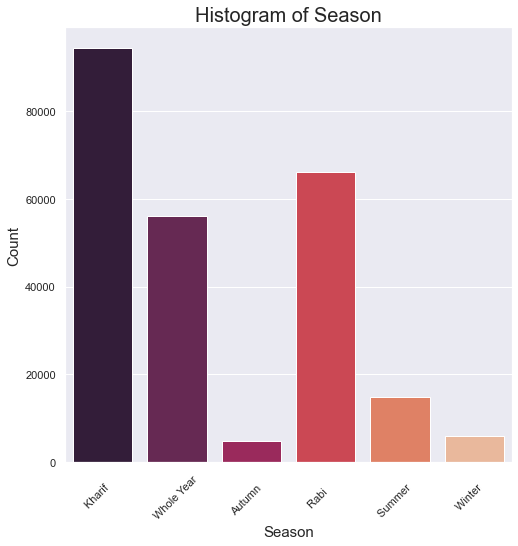

In [20]:
plt.figure(figsize = (8,8))
sns.set_theme(style = 'darkgrid', palette = 'rocket')
sns.countplot(x = 'Season', data = df_clean)
plt.title('Histogram of Season', fontsize = 20)
plt.xlabel('Season', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation = 45);

Kharif is the dominant season by having more entries in the dataset

<Figure size 576x576 with 0 Axes>

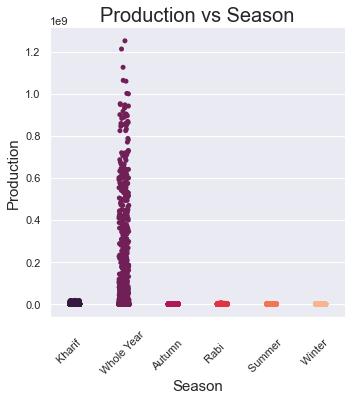

In [21]:
plt.figure(figsize = (8,8))
sns.catplot(x = 'Season', y = 'Production', data = df_clean)
plt.title('Production vs Season', fontsize = 20)
plt.xlabel('Season', fontsize = 15)
plt.ylabel('Production', fontsize = 15)
plt.xticks(rotation = 45);

From this plot, more Production happen during the whole year 

In [23]:
df_clean.groupby(['Crop','Crop_Year'], sort = True)['Production'].sum().nlargest(20)

Crop       Crop_Year
Coconut    2011         1.359422e+10
           2013         1.221919e+10
           2006         8.092567e+09
           2014         8.067812e+09
           2004         7.663984e+09
           2012         7.494435e+09
           2005         7.453185e+09
           2003         7.355743e+09
           2002         7.150889e+09
           2009         7.041993e+09
           2008         7.039784e+09
           2001         6.881287e+09
           2000         6.880409e+09
           2007         6.299914e+09
           1999         5.859817e+09
           2010         5.596200e+09
           1998         5.283860e+09
Sugarcane  1997         5.012291e+08
           2013         3.468605e+08
           2011         3.453955e+08
Name: Production, dtype: float64

Coconut has the highest production

#### Plotting the Production for each year

Text(0, 0.5, 'Production')

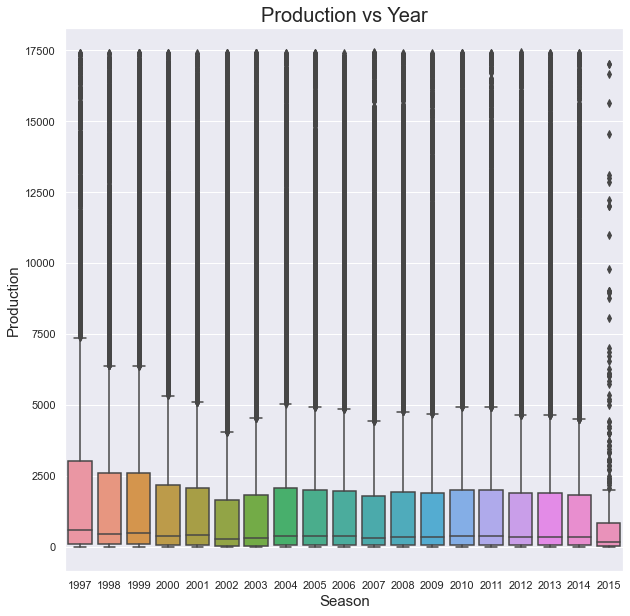

In [37]:
plt.figure(figsize = (10,10))
sns.boxplot(x = 'Crop_Year', y = 'Production', data = df_clean)
plt.title('Production vs Year', fontsize = 20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Production', fontsize = 15)

There are a lot of outliers in this dataset. Let us handle the outliers for more accurate results

### Handling the outliers
- In handling the outliers, there were two approaches taken
    - The first approach was using log transformation to normalise the dataset
    - Secondly, the outliers were dropped from the dataset using interquartile range.

In [25]:
df_clean_log = df_clean.copy()

In [26]:
df_clean_log ['Production'] = df_clean_log['Production'].apply(np.log)

Text(0, 0.5, 'Production')

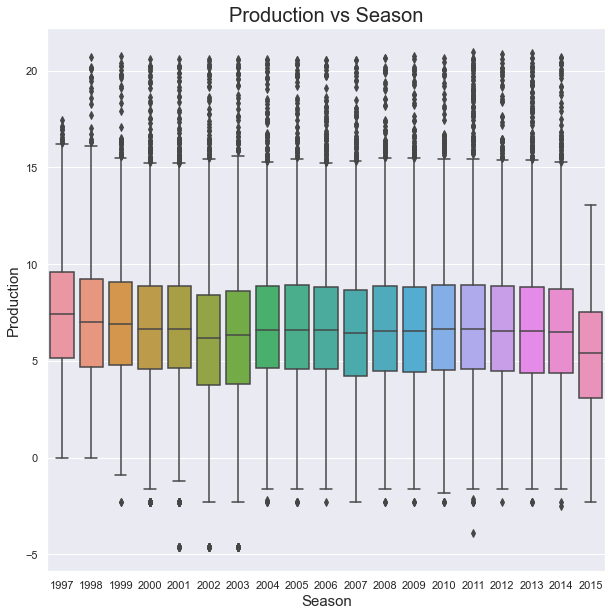

In [27]:
plt.figure(figsize = (10,10))
sns.boxplot(x = 'Crop_Year', y = 'Production', data = df_clean_log)
plt.title('Production vs Year', fontsize = 20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Production', fontsize = 15)

### Dropping the Outliers of the dataset using interquartile range

In [28]:
# Compute the IQR for each numerical column
Q1 = df_clean['Production'].quantile(0.25)
Q3 = df_clean['Production'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the indices of the outliers
outliers = df_clean[(df_clean['Production'] < lower_bound) | (df_clean['Production'] > upper_bound)].index


In [29]:
# Drop the rows containing the outliers
df_clean = df_clean.drop(outliers)

Text(0, 0.5, 'Production')

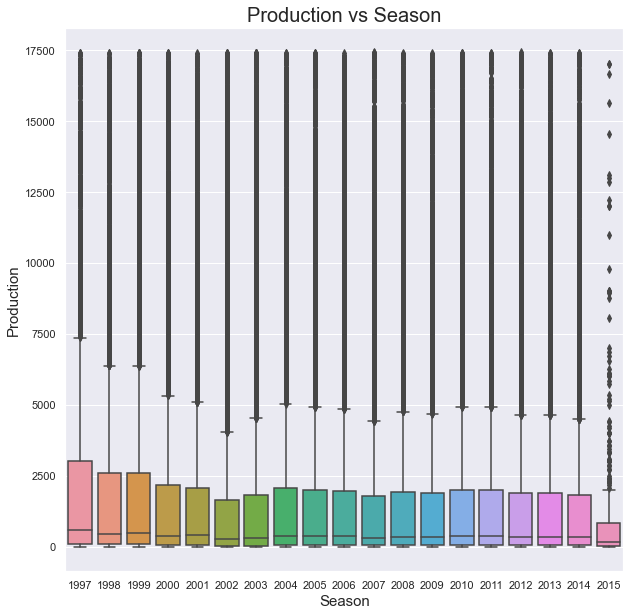

In [30]:
plt.figure(figsize = (10,10))
sns.boxplot(x = 'Crop_Year', y = 'Production', data = df_clean)
plt.title('Production vs Year', fontsize = 20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Production', fontsize = 15)

From the above steps, it is observed that the log transformation had a better outcome. However, some outliers were still present. Another attempt will be made to remove the outliers but this time by dropping them from the log transformed dataset.

### Drop the outliers after the log transformation

In [32]:
# Compute the IQR for each numerical column
Q1 = df_clean_log['Production'].quantile(0.25)
Q3 = df_clean_log['Production'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the indices of the outliers
outliers = df_clean_log[(df_clean_log['Production'] < lower_bound) | (df_clean_log['Production'] > upper_bound)].index

In [34]:
# Drop the rows containing the outliers
df_clean_log = df_clean_log.drop(outliers)

Text(0, 0.5, 'Production')

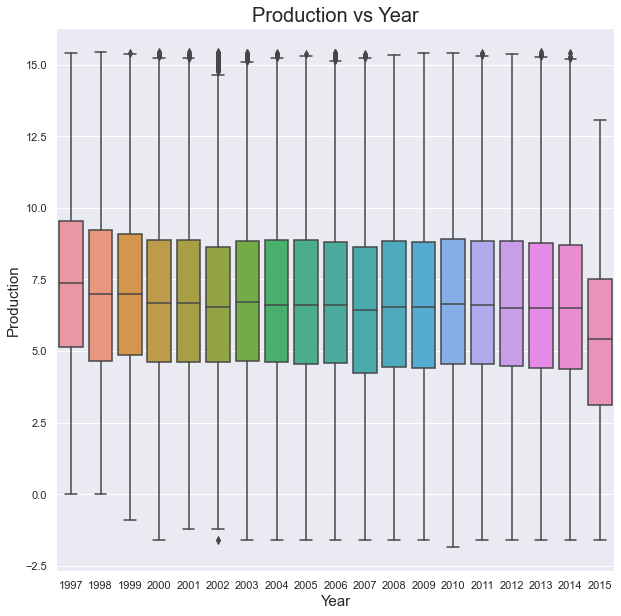

In [39]:
plt.figure(figsize = (10,10))
sns.boxplot(x = 'Crop_Year', y = 'Production', data = df_clean_log)
plt.title('Production vs Year', fontsize = 20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Production', fontsize = 15)

This gave a better outcome of the dataset.

#### With this log transformed dataset, we can get more accurate results of our findings

Let us check the season with the most production 

<Figure size 576x576 with 0 Axes>

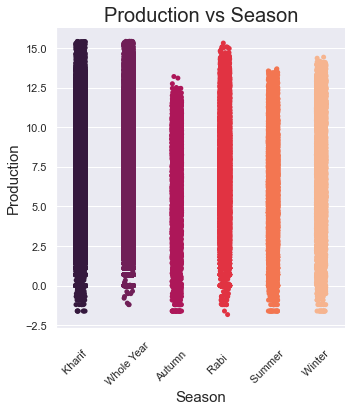

In [36]:
plt.figure(figsize = (8,8))
sns.catplot(x = 'Season', y = 'Production', data = df_clean_log)
plt.title('Production vs Season', fontsize = 20)
plt.xlabel('Season', fontsize = 15)
plt.ylabel('Production', fontsize = 15)
plt.xticks(rotation = 45);

When previously plot before the transformation, the conclusion was that the whole year has the highest distibution of production with the other seasons not having much effect. However, from this plot after transformation and getting rid of the outliers, it is observed that other seasons also have significant distributions. Kharif, Rabi and Whole Year had more distribution and higher production value. 

In [49]:
df_clean_log.groupby(['Crop'])['Production'].agg(['mean', 'sum', 'count']).sort_values('sum', ascending=False).reset_index()[:10]

,Crop,mean,sum,count
0,Rice,9.854205,148581.710377,15078
1,Maize,7.496574,102875.482168,13723
2,Wheat,9.951608,78339.059118,7872
3,Sugarcane,10.259596,77480.469031,7552
4,Potato,8.574330,59248.618615,6910
5,Groundnut,6.746180,58887.404128,8729
6,Urad,5.646528,54545.462059,9660
7,Rapeseed &Mustard,6.904847,51800.160634,7502
8,Onion,7.403046,51665.858655,6979
9,Jowar,7.284133,50719.417995,6963


The crop with the highest production is the Rice